<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/lesson41/lesson41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = datasets.load_wine()

In [4]:
model = KMeans(n_clusters=3)

In [5]:
model.fit(df.data)

KMeans(n_clusters=3)

In [6]:
predictions = model.predict(df.data)

In [7]:
predictions

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

In [9]:
cluster_0 = df.data[predictions == 0]
cluster_1 = df.data[predictions == 1]
cluster_2 = df.data[predictions == 2]

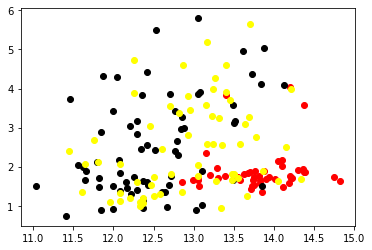

In [10]:
plt.scatter(cluster_0[:,0] , cluster_0[:,1] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[:,1] , color = 'black')
plt.scatter(cluster_2[:,0] , cluster_2[:,1] , color = 'yellow')

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [28]:
dbscan = DBSCAN(eps=50, min_samples=4)

In [30]:
dbscan.fit(df.data)

DBSCAN(eps=50, min_samples=4)

In [31]:
pca = PCA(n_components=2).fit(df.data)
pca_2d = pca.transform(df.data)

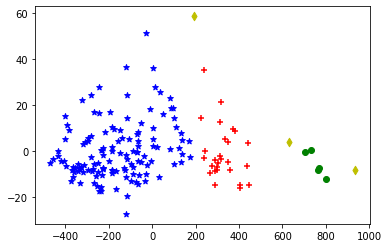

In [32]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [18]:
mergings = linkage(df.data, method = 'complete')

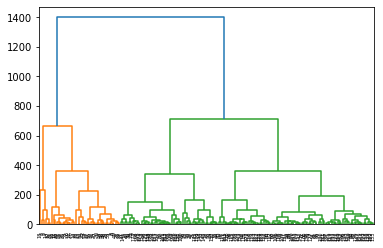

In [19]:
clusters = dendrogram(mergings,leaf_rotation=90)